In [1]:
#importing needed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Stroke Data

In [2]:
# Getting the data into a dataframe from the csv file and viewing the first 5 

stroke_df = pd.read_csv('Datasets/Stroke/healthcare-dataset-stroke-data.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Getting rid potential baises from the data such as gender,glucose level, and bmi 
# and unneeded data such as identifications

stroke_df = stroke_df.drop(['id'],axis =1)

In [4]:
#Looking at where there are null repsonses in the dataframe

stroke_df.isnull().sum()

#Getting rid of the row of the null responses from the dataframe,
            #since we are going to keep the columns that have the Null reponses 

stroke_df = stroke_df.dropna()

In [5]:
# Getting a simple analysis of qualitative data of the dataset  
# focusing on the realtativly weight of how many people gotten a stroke

stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# Getting the unique values of the dataset to get an insight of what the values are - checking if there's any
# incorrect inputs in our dataset
# Also getting the information of the type of data, columns, and null

def unique_values_in_columns(dataframe):
    unique_values_dict = {}
    
    for column in dataframe.columns:
        unique_values_dict[column] = dataframe[column].unique().tolist()
    
    return unique_values_dict, dataframe.info()

In [7]:
unique_values_in_columns(stroke_df)

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


({'gender': ['Male', 'Female', 'Other'],
  'age': [67.0,
   80.0,
   49.0,
   79.0,
   81.0,
   74.0,
   69.0,
   78.0,
   61.0,
   54.0,
   50.0,
   64.0,
   75.0,
   60.0,
   71.0,
   52.0,
   82.0,
   65.0,
   57.0,
   42.0,
   48.0,
   72.0,
   58.0,
   76.0,
   39.0,
   77.0,
   63.0,
   73.0,
   56.0,
   45.0,
   70.0,
   59.0,
   66.0,
   43.0,
   68.0,
   47.0,
   53.0,
   38.0,
   55.0,
   46.0,
   32.0,
   51.0,
   14.0,
   3.0,
   8.0,
   37.0,
   40.0,
   35.0,
   20.0,
   44.0,
   25.0,
   27.0,
   23.0,
   17.0,
   13.0,
   4.0,
   16.0,
   22.0,
   30.0,
   29.0,
   11.0,
   21.0,
   18.0,
   33.0,
   24.0,
   36.0,
   0.64,
   34.0,
   41.0,
   0.88,
   5.0,
   26.0,
   31.0,
   7.0,
   12.0,
   62.0,
   2.0,
   9.0,
   15.0,
   28.0,
   10.0,
   1.8,
   0.32,
   1.08,
   19.0,
   6.0,
   1.16,
   1.0,
   1.4,
   1.72,
   0.24,
   1.64,
   1.56,
   0.72,
   1.88,
   1.24,
   0.8,
   0.4,
   0.08,
   1.48,
   0.56,
   1.32,
   0.16,
   0.48],
  'hypertension': [0, 1],
  

In [8]:
# Changing the type of data the columns are

stroke_df['avg_glucose_level'] = stroke_df['avg_glucose_level'].astype(int)
stroke_df['bmi'] = stroke_df['bmi'].astype(int)
stroke_df['age'] = stroke_df['age'].astype(int)


In [9]:
# One-hot encoding the data so that it can be used to train the model
# doing so for data that has atleast 2 qualitative inputs

work_encoded = pd.get_dummies(stroke_df['work_type'])
gender_encoded = pd.get_dummies(stroke_df['gender'])
residence_encoded = pd.get_dummies(stroke_df['Residence_type'])
smoking_encoded = pd.get_dummies(stroke_df['smoking_status'])

stroke_df = pd.concat([stroke_df['hypertension'], stroke_df['heart_disease'],
                       stroke_df['ever_married'], work_encoded, 
                       residence_encoded, smoking_encoded, gender_encoded,
                       stroke_df['avg_glucose_level'], stroke_df['bmi'],
                       stroke_df['age'], stroke_df['stroke']], axis =1 )

stroke_df

,hypertension,heart_disease,ever_married,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,...,formerly smoked,never smoked,smokes,Female,Male,Other,avg_glucose_level,bmi,age,stroke
0,0,1,Yes,False,False,True,False,False,False,True,...,True,False,False,False,True,False,228,36,67,1
2,0,1,Yes,False,False,True,False,False,True,False,...,False,True,False,False,True,False,105,32,80,1
3,0,0,Yes,False,False,True,False,False,False,True,...,False,False,True,True,False,False,171,34,49,1
4,1,0,Yes,False,False,False,True,False,True,False,...,False,True,False,True,False,False,174,24,79,1
5,0,0,Yes,False,False,True,False,False,False,True,...,True,False,False,False,True,False,186,29,81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,0,No,False,False,False,False,True,True,False,...,False,False,False,True,False,False,103,18,13,0
5106,0,0,Yes,False,False,False,True,False,False,True,...,False,True,False,True,False,False,125,40,81,0
5107,0,0,Yes,False,False,False,True,False,True,False,...,False,True,False,True,False,False,82,30,35,0
5108,0,0,Yes,False,False,True,False,False,True,False,...,True,False,False,False,True,False,166,25,51,0


In [10]:
# Checking the datatype of the dataset

unique_values_in_columns(stroke_df)

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   hypertension       4909 non-null   int64 
 1   heart_disease      4909 non-null   int64 
 2   ever_married       4909 non-null   object
 3   Govt_job           4909 non-null   bool  
 4   Never_worked       4909 non-null   bool  
 5   Private            4909 non-null   bool  
 6   Self-employed      4909 non-null   bool  
 7   children           4909 non-null   bool  
 8   Rural              4909 non-null   bool  
 9   Urban              4909 non-null   bool  
 10  Unknown            4909 non-null   bool  
 11  formerly smoked    4909 non-null   bool  
 12  never smoked       4909 non-null   bool  
 13  smokes             4909 non-null   bool  
 14  Female             4909 non-null   bool  
 15  Male               4909 non-null   bool  
 16  Other              4909 non-null   bool  
 17  

({'hypertension': [0, 1],
  'heart_disease': [1, 0],
  'ever_married': ['Yes', 'No'],
  'Govt_job': [False, True],
  'Never_worked': [False, True],
  'Private': [True, False],
  'Self-employed': [False, True],
  'children': [False, True],
  'Rural': [False, True],
  'Urban': [True, False],
  'Unknown': [False, True],
  'formerly smoked': [True, False],
  'never smoked': [False, True],
  'smokes': [False, True],
  'Female': [False, True],
  'Male': [True, False],
  'Other': [False, True],
  'avg_glucose_level': [228,
   105,
   171,
   174,
   186,
   70,
   94,
   58,
   80,
   120,
   104,
   214,
   167,
   191,
   221,
   89,
   193,
   233,
   208,
   102,
   100,
   195,
   212,
   83,
   196,
   252,
   84,
   219,
   74,
   92,
   60,
   78,
   71,
   144,
   213,
   243,
   107,
   99,
   127,
   124,
   59,
   194,
   180,
   185,
   61,
   93,
   113,
   86,
   72,
   179,
   116,
   96,
   66,
   240,
   110,
   143,
   88,
   79,
   111,
   98,
   226,
   68,
   64,
   235,

In [11]:
# converting the bool input into an integer

def convert(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype == bool:
            dataframe[column] = dataframe[column].astype(int)
    return dataframe

In [12]:
# Converting the data inputs of "yes" or "no" into 0 or 1, respectively

print (stroke_df['ever_married'].value_counts())
stroke_df['ever_married'].replace(['No', 'Yes'], [0,1], inplace = True)
print (stroke_df['ever_married'].value_counts())

ever_married
Yes    3204
No     1705
Name: count, dtype: int64
ever_married
1    3204
0    1705
Name: count, dtype: int64


In [13]:
# Using the conversion function made ealier to convert that data into 0 or 1

convert(stroke_df)

,hypertension,heart_disease,ever_married,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,...,formerly smoked,never smoked,smokes,Female,Male,Other,avg_glucose_level,bmi,age,stroke
0,0,1,1,0,0,1,0,0,0,1,...,1,0,0,0,1,0,228,36,67,1
2,0,1,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,105,32,80,1
3,0,0,1,0,0,1,0,0,0,1,...,0,0,1,1,0,0,171,34,49,1
4,1,0,1,0,0,0,1,0,1,0,...,0,1,0,1,0,0,174,24,79,1
5,0,0,1,0,0,1,0,0,0,1,...,1,0,0,0,1,0,186,29,81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,103,18,13,0
5106,0,0,1,0,0,0,1,0,0,1,...,0,1,0,1,0,0,125,40,81,0
5107,0,0,1,0,0,0,1,0,1,0,...,0,1,0,1,0,0,82,30,35,0
5108,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,166,25,51,0


In [14]:
#Convert Data to a numpy Array

stroke_np = stroke_df.values


#Preview of the first 5 rows

print(stroke_np[0:5,:])

[[  0   1   1   0   0   1   0   0   0   1   0   1   0   0   0   1   0 228
   36  67   1]
 [  0   1   1   0   0   1   0   0   1   0   0   0   1   0   0   1   0 105
   32  80   1]
 [  0   0   1   0   0   1   0   0   0   1   0   0   0   1   1   0   0 171
   34  49   1]
 [  1   0   1   0   0   0   1   0   1   0   0   0   1   0   1   0   0 174
   24  79   1]
 [  0   0   1   0   0   1   0   0   0   1   0   1   0   0   0   1   0 186
   29  81   1]]


In [15]:
# Obtaining the features - set a X  and our target - set as Y
X = stroke_np[:,:20]
Y = stroke_np[:,20:]

In [16]:
# Stack them together for shuffling and shuffled the data points to counter pattern recognition of the sequence

X_and_Y = np.hstack((X, Y))            
np.random.shuffle(X_and_Y)     

print(X.shape)
print(Y.shape)
print(X_and_Y[:5])         

(4909, 20)
(4909, 1)
[[  0   0   1   1   0   0   0   0   1   0   0   0   1   0   1   0   0 104
   26  31   0]
 [  0   1   1   0   0   0   1   0   0   1   0   0   1   0   0   1   0 187
   34  51   0]
 [  0   0   0   0   0   1   0   0   0   1   0   0   1   0   1   0   0  74
   28  59   0]
 [  0   0   1   0   0   1   0   0   1   0   1   0   0   0   1   0   0  68
   33  75   0]
 [  0   0   1   0   0   1   0   0   1   0   0   0   0   1   1   0   0  83
   42  37   0]]


In [17]:
# Setting X and Y as shuffled


X_shuffled = X_and_Y[:,:20]
Y_shuffled = X_and_Y[:,20:]

X_shuffled, Y_shuffled

(array([[  0,   0,   1, ..., 104,  26,  31],
        [  0,   1,   1, ..., 187,  34,  51],
        [  0,   0,   0, ...,  74,  28,  59],
        ...,
        [  0,   0,   0, ...,  56,  21,  19],
        [  0,   0,   0, ...,  71,  19,  81],
        [  0,   1,   1, ...,  91,  23,  56]]),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]))

# Functions for Models

## Decision Tree Classifier Function

In [18]:
#Function for DT to be applied to all datasets

def DT(X_Test, X_Train, Y_Test, Y_Train):
    
    D_list = np.array([1, 2, 3, 4, 5]) # list of parameters
    parameters = {'max_depth': D_list}  
    
    #Creating the model that will be used to train the data and fitting the data
    DT.DT_model = DecisionTreeClassifier()
    DT.DT_model = GridSearchCV(DT.DT_model, parameters, return_train_score=True) #finding the best parameter depth
    DT.DT_model.fit(X_Train, Y_Train)

    Y_pred = DT.DT_model.predict(X_Test).astype('int') #Creating predictions from the fitted data
    
    #Getting accuracy socre and precision
    # Creating a heat map of what was being classified as what (0 no, 1 yes)
    DT.accuracy = accuracy_score(Y_Test, Y_pred)
    conf_matrix = confusion_matrix(Y_Test, Y_pred)
    classification_rep = classification_report(Y_Test, Y_pred)
    DT.precision = precision_score(Y_Test, Y_pred)
    print("Accuracy:", DT.accuracy)
    print("Precision:", DT.precision)
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_rep)
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Customize the plot
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Show the plot
    plt.show()
    print("Accuracy:", DT.accuracy)
    print("Precision:", DT.precision)
    
    DT.accuracy_Train = DT.DT_model.score(X_Train, Y_Train)
    DT.optimal_classifier = DT.DT_model.best_params_['max_depth']

    return DT.accuracy, DT.precision

## SVM Classifier Function

In [19]:
def SVM(X_Test, X_Train, Y_Test, Y_Train):
    
    C_list     = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1] # Different parameters to try
    parameters = {'C': C_list}
    
    #fit the classifier with the training data
    SVM.SVM_model = svm.SVC()
    SVM.SVM_model = GridSearchCV(SVM.SVM_model, parameters)#Perform a grid Search to identify the best C
    SVM.SVM_model.fit(X_Train, Y_Train)
    Y_pred = SVM.SVM_model.predict(X_Test) #creating predictions fitted data
    
    #Getting accuracy socre and precision
    # Creating a heat map of what was being classified as what (0 no, 1 yes)
    SVM.accuracy = accuracy_score(Y_Test, Y_pred)
    conf_matrix = confusion_matrix(Y_Test, Y_pred)
    classification_rep = classification_report(Y_Test, Y_pred)
        
    SVM.precision = precision_score(Y_Test, Y_pred)
        

    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_rep)
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Customize the plot
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Show the plot
    plt.show()
    print("Accuracy:", SVM.accuracy)
    print("Precision:", SVM.precision)
        
    SVM.accuracy_Train = SVM.SVM_model.score(X_Train, Y_Train)
     #Find the optimal C parameter and use that to redefine the classifier
    SVM.optimal_classifier = svm.SVC(kernel = 'linear', C = SVM.SVM_model.best_params_['C'] )

    
    return SVM.accuracy, SVM.precision

## Log Classifier Function

In [20]:
def LOG(X_Test, X_Train, Y_Test, Y_Train):
    L_list = np.array([0.00001, 0.0001, 0.001, 0.01, 0.1, 1]) # List of potential C parameters
    parameters = {'C':L_list}
    
    #Creating the model and Fitting the data
    LOG.LOG_model = LogisticRegression()
    LOG.LOG_model = GridSearchCV(LOG.LOG_model, parameters) #Perform a grid Search to identify the best C
    LOG.LOG_model.fit(X_Train, Y_Train)
    Y_pred = LOG.LOG_model.predict(X_Test) #Finding the predictions from the fitted data
    
    #Getting accuracy socre and precision
    # Creating a heat map of what was being classified as what (0 no, 1 yes)
    LOG.accuracy = accuracy_score(Y_Test, Y_pred)
    conf_matrix = confusion_matrix(Y_Test, Y_pred)
    classification_rep = classification_report(Y_Test, Y_pred)
    LOG.precision = precision_score(Y_Test, Y_pred)

    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_rep)
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Customize the plot
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Show the plot
    plt.show()
    print("Accuracy:", LOG.accuracy)
    print("Precision:", LOG.precision)
    
    LOG.accuracy_Train = LOG.LOG_model.score(X_Train, Y_Train)
    LOG.optimal_classifier = LOG.LOG_model.best_params_['C']

    return LOG.accuracy, LOG.precision

## KNN Classifier Function

In [21]:
def knn (Test_X, Train_X, Test_Y, Train_Y):
    
    k_list = np.array([1, 2, 3, 4, 5, 6]) # List of potential n neighbor parameters
    parameters = {'n_neighbors':k_list}
    
    #Getting accuracy socre and precision
    # Creating a heat map of what was being classified as what (0 no, 1 yes)
    knn.knn_model = KNeighborsClassifier()
    knn.knn_model = GridSearchCV(knn.knn_model, parameters)
    knn.knn_model.fit(Train_X, Train_Y)
    Y_pred = knn.knn_model.predict(Test_X)
    
    #Getting accuracy socre and precision
    # Creating a heat map of what was being classified as what (0 no, 1 yes)
    knn.accuracy = accuracy_score(Test_Y, Y_pred)
    conf_matrix = confusion_matrix(Test_Y, Y_pred)
    classification_rep = classification_report(Test_Y,Y_pred)
    knn.precision = precision_score(Test_Y, Y_pred)

    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_rep)
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# Customize the plot
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Show the plot
    plt.show()
    print("Accuracy:", knn.accuracy)
    print("Precision:", knn.precision)

    knn.accuracy_Train = knn.knn_model.score(Train_X, Train_Y)
    knn.optimal_classifier = knn.knn_model.best_params_['n_neighbors']

    return knn.accuracy, knn.precision

## Muliti Layer Perceptron 

In [22]:
def MLP(Test_X, Train_X, Test_Y, Train_Y):
    
    # Creating a model with specific solver, alpha, and hidden layer size
    MLP.MLP_model =  MLPClassifier(solver='lbfgs', alpha=1e-5, 
                           hidden_layer_sizes=(5,5), random_state=1)
    MLP.MLP_model.fit(Train_X,Train_Y)
    Y_pred = MLP.MLP_model.predict(Test_X)
    
    #Getting accuracy socre and precision
    # Creating a heat map of what was being classified as what (0 no, 1 yes)
    MLP.accuracy = accuracy_score(Test_Y, Y_pred)
    conf_matrix = confusion_matrix(Test_Y, Y_pred)
    classification_rep = classification_report(Test_Y,Y_pred)
    MLP.precision = precision_score(Test_Y, Y_pred)

    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_rep)
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# Customize the plot
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Show the plot
    plt.show()
    print("Accuracy:", MLP.accuracy)
    print("Precision:", MLP.precision)
    MLP.accuracy_Train = MLP.MLP_model.score(Train_X, Train_Y)

    return MLP.accuracy, MLP.precision

# Running the Functions

## Decision Tree Classifer - Stroke Data

In [23]:
#Spliting the data into 20/80, 50/50, and 80/20
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_shuffled, Y_shuffled, test_size=0.2, random_state=42)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_shuffled, Y_shuffled, test_size=0.5, random_state=42)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_shuffled, Y_shuffled, test_size=0.8, random_state=42)

Accuracy: 0.9592668024439919
Precision: 0.0

Confusion Matrix:
[[942   0]
 [ 40   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       942
           1       0.00      0.00      0.00        40

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmvillal/.local/lib/python3.

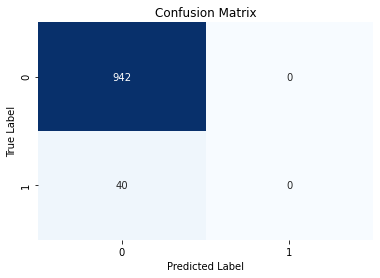

Accuracy: 0.9592668024439919
Precision: 0.0


NameError: name 'clf' is not defined

In [24]:
DT(X_test1, X_train1, Y_test1, Y_train1)
accuracy_DT1 = DT.accuracy
precision_DT1 = DT.precision
model_DT1 = DT.DT_model
accuracy_tr_DT1 = DT.accuracy_Train
opt_classifier1 = DT.optimal_classifier
print(opt_classifier1)

Accuracy: 0.9230142566191446
Precision: 0.08490566037735849

Confusion Matrix:
[[2257   97]
 [  92    9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2354
           1       0.08      0.09      0.09       101

    accuracy                           0.92      2455
   macro avg       0.52      0.52      0.52      2455
weighted avg       0.92      0.92      0.92      2455



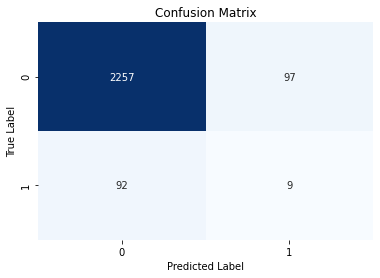

Accuracy: 0.9230142566191446
Precision: 0.08490566037735849
1


In [26]:
DT(X_test2, X_train2, Y_test2, Y_train2)
accuracy_DT2 = DT.accuracy
precision_DT2 = DT.precision
model_DT2 = DT.DT_model
accuracy_tr_DT2 = DT.accuracy_Train
opt_classifier2 = DT.optimal_classifier
print(opt_classifier2)

Accuracy: 0.9187881873727087
Precision: 0.10837438423645321

Confusion Matrix:
[[3587  181]
 [ 138   22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3768
           1       0.11      0.14      0.12       160

    accuracy                           0.92      3928
   macro avg       0.54      0.54      0.54      3928
weighted avg       0.93      0.92      0.92      3928



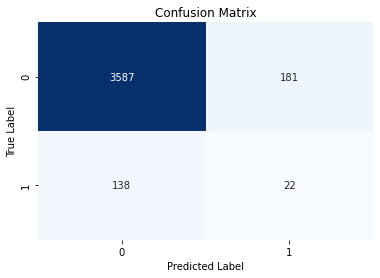

Accuracy: 0.9187881873727087
Precision: 0.10837438423645321
1


In [27]:
DT(X_test3, X_train3, Y_test3, Y_train3)
accuracy_DT3 = DT.accuracy
precision_DT3 = DT.precision
model_DT3= DT.DT_model
accuracy_tr_DT3 = DT.accuracy_Train
opt_classifier3 = DT.optimal_classifier
print(opt_classifier3)

In [28]:
#Doing a 5-fold cross validation
score_DT1 = np.average( cross_val_score(model_DT1, X_train1, Y_train1, cv=5) )
score_DT2 = np.average( cross_val_score(model_DT2, X_train2, Y_train2, cv=5) )
score_DT3 = np.average( cross_val_score(model_DT3, X_train3, Y_train3, cv=5) )

In [36]:
#results
print('DT Test Accuracy 20/80 split:', accuracy_DT1)
print('DT Test Accuracy 50/50 split:', accuracy_DT2)
print('DT Test Accuracy 80/20 split:', accuracy_DT3)
print('')
print('DT Train Accuracy 20/80 split:', accuracy_tr_DT1)
print('DT Train Accuracy 50/50 split:', accuracy_tr_DT2)
print('DT Train Accuracy 80/20 split:', accuracy_tr_DT3)
print('')
print('DT Validation Accuracy 20/80 split:', score_DT1)
print('DT Validation Accuracy 50/50 split:', score_DT2)
print('DT Validation Accuracy 80/20 split:', score_DT3)
print('')
print('DT Accuracy 20/80 split:', (accuracy_DT1+accuracy_tr_DT1+score_DT1)/3)
print('DT Accuracy 50/50 split:', (accuracy_DT2+accuracy_tr_DT2+score_DT2)/3)
print('DT Accuracy 80/20 split:', (accuracy_DT3+accuracy_tr_DT3+score_DT3)/3)
print('')
print('Best Cs:', opt_classifier1, ',',opt_classifier2,',', opt_classifier3 )

DT Test Accuracy 20/80 split: 0.9124236252545825
DT Test Accuracy 50/50 split: 0.9230142566191446
DT Test Accuracy 80/20 split: 0.9187881873727087

DT Train Accuracy 20/80 split: 1.0
DT Train Accuracy 50/50 split: 1.0
DT Train Accuracy 80/20 split: 1.0

DT Validation Accuracy 20/80 split: 0.9182583750668547
DT Validation Accuracy 50/50 split: 0.9180980090610582
DT Validation Accuracy 80/20 split: 0.8950119133947997

DT Accuracy 20/80 split: 0.9435606667738125
DT Accuracy 50/50 split: 0.947037421893401
DT Accuracy 80/20 split: 0.9379333669225027

Best Cs: 1 , 1 , 1


##  SVM Classifer - Stroke Data

/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t


Confusion Matrix:
[[940   0]
 [ 42   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmvillal/.local/lib/python3.

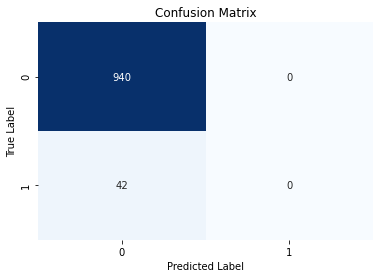

Accuracy: 0.9572301425661914
Precision: 0.0


In [41]:
SVM(X_test1, X_train1, Y_test1, Y_train1)
accuracy_SVM1 = SVM.accuracy
precision_SVM1 = SVM.precision
model_SVM1 = SVM.SVM_model
accuracy_tr_SVM1 = SVM.accuracy_Train
best_C1 = SVM.optimal_classifier

/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t


Confusion Matrix:
[[2354    0]
 [ 101    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2354
           1       0.00      0.00      0.00       101

    accuracy                           0.96      2455
   macro avg       0.48      0.50      0.49      2455
weighted avg       0.92      0.96      0.94      2455



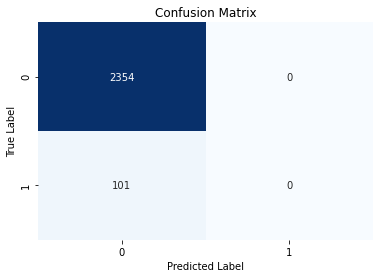

Accuracy: 0.9588594704684318
Precision: 0.0


In [43]:
SVM(X_test2, X_train2, Y_test2, Y_train2)
accuracy_SVM2 = SVM.accuracy
precision_SVM2 = SVM.precision
model_SVM2 = SVM.SVM_model
accuracy_tr_SVM2 = SVM.accuracy_Train
best_C2 = SVM.optimal_classifier

/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t


Confusion Matrix:
[[3768    0]
 [ 160    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3768
           1       0.00      0.00      0.00       160

    accuracy                           0.96      3928
   macro avg       0.48      0.50      0.49      3928
weighted avg       0.92      0.96      0.94      3928



/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmvillal/.local/lib/python3.

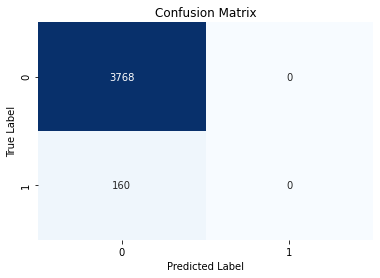

Accuracy: 0.9592668024439919
Precision: 0.0


In [44]:
SVM(X_test3, X_train3, Y_test3, Y_train3)
accuracy_SVM3 = SVM.accuracy
precision_SVM3 = SVM.precision
model_SVM3 = SVM.SVM_model
accuracy_tr_SVM3 = SVM.accuracy_Train
best_C3 = SVM.optimal_classifier

In [45]:
score_SVM1 = np.average( cross_val_score(model_SVM1, X_train1, Y_train1, cv=5) )
score_SVM2 = np.average( cross_val_score(model_SVM2, X_train2, Y_train2, cv=5) )
score_SVM3 = np.average( cross_val_score(model_SVM3, X_train3, Y_train3, cv=5) )

/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [46]:
print('SVM Test Accuracy 20/80 split:', accuracy_SVM1)
print('SVM Test Accuracy 50/50 split:', accuracy_SVM2)
print('SVM Test Accuracy 80/20 split:', accuracy_SVM3)
print('')
print('SVM Train Accuracy 20/80 split:', accuracy_tr_SVM1)
print('SVM Train Accuracy 50/50 split:', accuracy_tr_SVM2)
print('SVM Train Accuracy 80/20 split:', accuracy_tr_SVM3)
print('')
print('SVM Validation Accuracy 20/80 split:', score_SVM1)
print('SVM Validation Accuracy 50/50 split:', score_SVM2)
print('SVM Validation Accuracy 80/20 split:', score_SVM3)
print('')
print('SVM Accuracy 20/80 split:', (accuracy_SVM1+accuracy_tr_SVM1+score_SVM1)/3)
print('SVM Accuracy 50/50 split:', (accuracy_SVM2+accuracy_tr_SVM2+score_SVM2)/3)
print('SVM Accuracy 80/20 split:', (accuracy_SVM3+accuracy_tr_SVM3+score_SVM3)/3)
print('')
print('Best C:', best_C1,', ', best_C2,', ',best_C3)

SVM Test Accuracy 20/80 split: 0.9572301425661914
SVM Test Accuracy 50/50 split: 0.9588594704684318
SVM Test Accuracy 80/20 split: 0.9592668024439919

SVM Train Accuracy 20/80 split: 0.9574738986503692
SVM Train Accuracy 50/50 split: 0.9559902200488998
SVM Train Accuracy 80/20 split: 0.9500509683995922

SVM Validation Accuracy 20/80 split: 0.9574742710815058
SVM Validation Accuracy 50/50 split: 0.9559906895548442
SVM Validation Accuracy 80/20 split: 0.9500517973686936

SVM Accuracy 20/80 split: 0.9573927707660221
SVM Accuracy 50/50 split: 0.956946793357392
SVM Accuracy 80/20 split: 0.9531231894040926
Best C: SVC(C=1e-05, kernel='linear') ,  SVC(C=1e-05, kernel='linear') ,  SVC(C=1e-05, kernel='linear')


## Logistic  - Stroke Data

/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t


Confusion Matrix:
[[940   0]
 [ 42   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmvillal/.local/lib/python3.

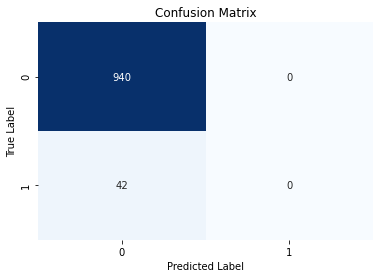

Accuracy: 0.9572301425661914
Precision: 0.0


In [47]:
LOG(X_test1, X_train1, Y_test1, Y_train1)
accuracy_log1 = LOG.accuracy
precision_log1 = LOG.precision
model_log1 = LOG.LOG_model
accuracy_tr_LOG1 = LOG.accuracy_Train
best_C1 = LOG.optimal_classifier

/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t


Confusion Matrix:
[[2353    1]
 [ 101    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2354
           1       0.00      0.00      0.00       101

    accuracy                           0.96      2455
   macro avg       0.48      0.50      0.49      2455
weighted avg       0.92      0.96      0.94      2455



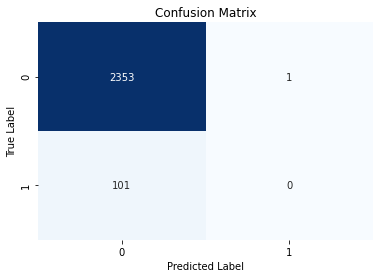

Accuracy: 0.9584521384928717
Precision: 0.0


In [48]:
LOG(X_test2, X_train2, Y_test2, Y_train2)
accuracy_log2 = LOG.accuracy
precision_log2 = LOG.precision
model_log2 = LOG.LOG_model
accuracy_tr_LOG2 = LOG.accuracy_Train
best_C2 = LOG.optimal_classifier

/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t


Confusion Matrix:
[[3767    1]
 [ 158    2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3768
           1       0.67      0.01      0.02       160

    accuracy                           0.96      3928
   macro avg       0.81      0.51      0.50      3928
weighted avg       0.95      0.96      0.94      3928



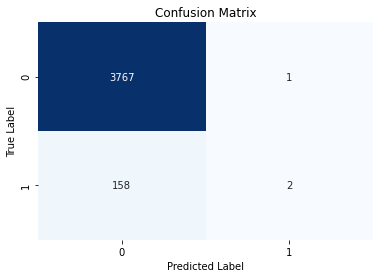

Accuracy: 0.9595213849287169
Precision: 0.6666666666666666


In [49]:
LOG(X_test3, X_train3, Y_test3, Y_train3)
accuracy_log3 = LOG.accuracy
precision_log3 = LOG.precision
model_log3 = LOG.LOG_model
accuracy_tr_LOG3 = LOG.accuracy_Train
best_C3 = LOG.optimal_classifier

In [50]:
score_LOG1 = np.average( cross_val_score(model_log1, X_train1, Y_train1, cv=5) )
score_LOG2 = np.average( cross_val_score(model_log2, X_train2, Y_train2, cv=5) )
score_LOG3 = np.average( cross_val_score(model_log3, X_train3, Y_train3, cv=5) )

/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

In [51]:
print('LOG Test Accuracy 20/80 split:', accuracy_log1)
print('LOG Test Accuracy 50/50 split:', accuracy_log2)
print('LOG Test Accuracy 80/20 split:', accuracy_log3)
print('')
print('LOG Train Accuracy 20/80 split:', accuracy_tr_LOG1)
print('LOG Train Accuracy 50/50 split:', accuracy_tr_LOG2)
print('LOG Train Accuracy 80/20 split:', accuracy_tr_LOG3)
print('')
print('LOG Validation Accuracy 20/80 split:', score_LOG1)
print('LOG Validation Accuracy 50/50 split:', score_LOG2)
print('LOG Validation Accuracy 80/20 split:', score_LOG3)
print('')
print('LOG Accuracy 20/80 split:', (accuracy_log1+accuracy_tr_LOG1+score_LOG1)/3)
print('LOG Accuracy 50/50 split:', (accuracy_log2+accuracy_tr_LOG2+score_LOG2)/3)
print('LOG Accuracy 80/20 split:', (accuracy_log3+accuracy_tr_LOG3+score_LOG3)/3)
print('')
print('Best C:', best_C1,', ', best_C2,', ',best_C3)

LOG Test Accuracy 20/80 split: 0.9572301425661914
LOG Test Accuracy 50/50 split: 0.9584521384928717
LOG Test Accuracy 80/20 split: 0.9595213849287169

LOG Train Accuracy 20/80 split: 0.9572192513368984
LOG Train Accuracy 50/50 split: 0.9563977180114099
LOG Train Accuracy 80/20 split: 0.9500509683995922

LOG Validation Accuracy 20/80 split: 0.9574745952253609
LOG Validation Accuracy 50/50 split: 0.9559906895548445
LOG Validation Accuracy 80/20 split: 0.9500517973686936

LOG Accuracy 20/80 split: 0.9573079963761503
LOG Accuracy 50/50 split: 0.9569468486863754
LOG Accuracy 80/20 split: 0.9532080502323342

Best C: 1.0 ,  1.0 ,  1e-05


##  KNN Classification - Stroke Data

/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha


Confusion Matrix:
[[936   4]
 [ 40   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.33      0.05      0.08        42

    accuracy                           0.96       982
   macro avg       0.65      0.52      0.53       982
weighted avg       0.93      0.96      0.94       982



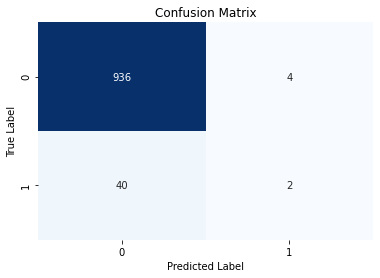

Accuracy: 0.955193482688391
Precision: 0.3333333333333333


In [54]:
knn(X_test1, X_train1, Y_test1, Y_train1)
accuracy_knn1 = knn.accuracy
precision_knn1 = knn.precision
model_knn1 = knn.knn_model
accuracy_tr_knn1 = knn.accuracy_Train
best_K1 = knn.optimal_classifier

/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha


Confusion Matrix:
[[2344   10]
 [  98    3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2354
           1       0.23      0.03      0.05       101

    accuracy                           0.96      2455
   macro avg       0.60      0.51      0.52      2455
weighted avg       0.93      0.96      0.94      2455



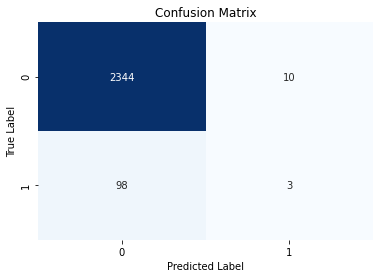

Accuracy: 0.9560081466395112
Precision: 0.23076923076923078


In [55]:
knn(X_test2, X_train2, Y_test2, Y_train2)
accuracy_knn2 = knn.accuracy
precision_knn2 = knn.precision
model_knn2 = knn.knn_model
accuracy_tr_knn2 = knn.accuracy_Train
best_K2 = knn.optimal_classifier

/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha


Confusion Matrix:
[[3757   11]
 [ 158    2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3768
           1       0.15      0.01      0.02       160

    accuracy                           0.96      3928
   macro avg       0.56      0.50      0.50      3928
weighted avg       0.93      0.96      0.94      3928



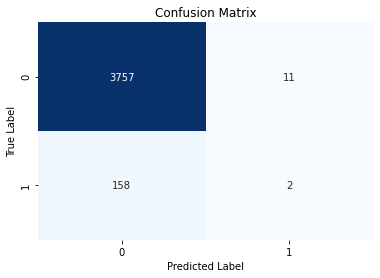

Accuracy: 0.9569755600814664
Precision: 0.15384615384615385


In [56]:
knn(X_test3, X_train3, Y_test3, Y_train3)
accuracy_knn3 = knn.accuracy
precision_knn3 = knn.precision
model_knn3 = knn.knn_model
accuracy_tr_knn3 = knn.accuracy_Train
best_K3 = knn.optimal_classifier

In [57]:
score_KNN1 = np.average( cross_val_score(model_knn1, X_train1, Y_train1, cv=5) )
score_KNN2 = np.average( cross_val_score(model_knn2, X_train2, Y_train2, cv=5) )
score_KNN3 = np.average( cross_val_score(model_knn3, X_train3, Y_train3, cv=5) )

/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jmvillal/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

In [58]:
print('KNN Test Accuracy 20/80 split:', accuracy_knn1)
print('KNN Test Accuracy 50/50 split:', accuracy_knn2)
print('KNN Test Accuracy 80/20 split:', accuracy_knn3)
print('')
print('KNN Train Accuracy 20/80 split:', accuracy_tr_knn1)
print('KNN Train Accuracy 50/50 split:', accuracy_tr_knn2)
print('KNN Train Accuracy 80/20 split:', accuracy_tr_knn3)
print('')
print('KNN Validation Accuracy 20/80 split:', score_KNN1)
print('KNN Validation Accuracy 50/50 split:', score_KNN2)
print('KNN Validation Accuracy 80/20 split:', score_KNN3)
print('')
print('KNN Accuracy 20/80 split:', (accuracy_knn1+accuracy_tr_knn1+score_KNN1)/3)
print('KNN Accuracy 50/50 split:', (accuracy_knn2+accuracy_tr_knn2+score_KNN2)/3)
print('KNN Accuracy 80/20 split:', (accuracy_knn3+accuracy_tr_knn3+score_KNN3)/3)
print('')
print('Best K:', best_K1,', ', best_K2,', ',best_K3)

KNN Test Accuracy 20/80 split: 0.955193482688391
KNN Test Accuracy 50/50 split: 0.9560081466395112
KNN Test Accuracy 80/20 split: 0.9569755600814664

KNN Train Accuracy 20/80 split: 0.9587471352177235
KNN Train Accuracy 50/50 split: 0.9572127139364304
KNN Train Accuracy 80/20 split: 0.9480122324159022

KNN Validation Accuracy 20/80 split: 0.952635127469571
KNN Validation Accuracy 50/50 split: 0.9515075439544454
KNN Validation Accuracy 80/20 split: 0.9490313892054285

KNN Accuracy 20/80 split: 0.9555252484585619
KNN Accuracy 50/50 split: 0.9549094681767957
KNN Accuracy 80/20 split: 0.9513397272342656

Best K: 6 ,  6 ,  6


## Multi Layer Perceptron  - Stroke Data

In [ ]:
MLP(X_test1, X_train1, Y_test1, Y_train1)
accuracy_mlp1 = MLP.accuracy
precision_mlp1 = MLP.precision
model_mlp1 = MLP.MLP_model
accuracy_tr_MLP1 = MLP.accuracy_Train

In [ ]:
MLP(X_test2, X_train2, Y_test2, Y_train2)
accuracy_mlp2 = MLP.accuracy
precision_mlp2 = MLP.precision
model_mlp2 = MLP.MLP_model
accuracy_tr_MLP2 = MLP.accuracy_Train

In [ ]:
MLP(X_test3, X_train3, Y_test3, Y_train3)
accuracy_mlp3 = MLP.accuracy
precision_mlp3 = MLP.precision
model_mlp3 = MLP.MLP_model
accuracy_tr_MLP3 = MLP.accuracy_Train

In [ ]:
score_MLP1 = np.average( cross_val_score(model_mlp1, X_train1, Y_train1, cv=5) )
score_MLP2 = np.average( cross_val_score(model_mlp2, X_train2, Y_train2, cv=5) )
score_MLP3 = np.average( cross_val_score(model_mlp3, X_train3, Y_train3, cv=5) )

In [ ]:
print('MLP Test Accuracy 20/80 split:', accuracy_mlp1)
print('MLP Test Accuracy 50/50 split:', accuracy_mlp2)
print('MLP Test Accuracy 80/20 split:', accuracy_mlp3)
print('')
print('MLP Train Accuracy 20/80 split:', accuracy_tr_MLP1)
print('MLP Train Accuracy 50/50 split:', accuracy_tr_MLP2)
print('MLP Train Accuracy 80/20 split:', accuracy_tr_MLP3)
print('')
print('MLP Validation Accuracy 20/80 split:', score_MLP1)
print('MLP Validation Accuracy 50/50 split:', score_MLP2)
print('MLP Validation Accuracy 80/20 split:', score_MLP3)
print('')
print('MLP Accuracy 20/80 split:', (accuracy_mlp1+accuracy_tr_MLP1+score_MLP1)/3)
print('MLP Accuracy 50/50 split:', (accuracy_mlp2+accuracy_tr_MLP2+score_MLP2)/3)
print('MLP Accuracy 80/20 split:', (accuracy_mlp3+accuracy_tr_MLP3+score_MLP3)/3)

# Heart Disease Data

In [ ]:
#Getting the csv file into a data frame
heart_df = pd.read_csv('Datasets/Heart/processed.cleveland.data')
heart_df.head()

In [ ]:
#droping slope and cheast pain
heart_df = heart_df.drop(['slope','cp'], axis =1 )

In [ ]:
#renaming certain columns
heart_df.rename(columns = {'trestbps':'rest_bps','fbs':'fasting_blodd_sugar',
                          'restecg':'rest_ecg','thalach':'max_heart_rate',
                          'exang':'excerise_induced_ang','ca':'num_major_vessicals',
                          'num':'Diagnostic'}, inplace = True) 
heart_df

In [ ]:
#Getting the sum of null inputs
heart_df.isnull().sum()

In [ ]:
#looking for unique inputs
unique_values_in_columns(heart_df)

In [ ]:
#Creating a new data frame that does not have ? 
heart_df = heart_df[heart_df != "?"]

In [ ]:
#looking at null sum
heart_df.isnull().sum()

In [ ]:
#Dropping null
heart_df = heart_df.dropna()

In [ ]:
#description of data
heart_df.describe()

In [ ]:
heart_df

In [ ]:
#Chaning the values of 1,2,3,4 into 1 since 1,2,3,4 are all heart disease
#but just want to look at if there is a heart problem
heart_df["Diagnostic"] = heart_df["Diagnostic"].map({0:0,1: 1, 2: 1,3:1,4:1})

In [ ]:
#looking at unique vlaues of diagonstic to see if any changes need to be made
heart_df["Diagnostic"].unique()

In [ ]:
#Encoding the Diagnosstic 
abel_encoder = LabelEncoder().fit(heart_df["Diagnostic"])
heart_df["Diagnostic"] = label_encoder.transform(heart_df["Diagnostic"])

In [ ]:
heart_df

In [ ]:
#Convert Data to a numpy Array

heart_np = heart_df.values


#Preview of the first 5 rows

print(heart_np[0:5,:])

In [ ]:
X_heart =  heart_np[:,:11]
Y_heart = heart_np[:,11:] 

In [ ]:
X_and_Y_heart = np.hstack((X_heart, Y_heart))            
np.random.shuffle(X_and_Y_heart)     

print(X_heart.shape)
print(Y_heart.shape)
print(X_and_Y_heart[:5]) 

In [ ]:
# Divide the data points into training set and test set.
X_shuffled_heart = X_and_Y_heart[:,:11]
Y_shuffled_heart = X_and_Y_heart[:,11:]

print (X_shuffled_heart.shape)
print(Y_shuffled_heart.shape)


In [ ]:
# Splitting the data and turing it into int

X_train_heart1, X_test_heart1, Y_train_heart1, Y_test_heart1 = train_test_split(X_shuffled_heart,
                                                        Y_shuffled_heart, test_size=0.2, random_state=42)
Y_train_heart1= Y_train_heart1.astype('int')
Y_test_heart1 = Y_test_heart1.astype('int')

X_train_heart2, X_test_heart2, Y_train_heart2, Y_test_heart2 = train_test_split(X_shuffled_heart,
                                                        Y_shuffled_heart, test_size=0.5, random_state=42)
Y_train_heart2= Y_train_heart2.astype('int')
Y_test_heart2 = Y_test_heart2.astype('int')


X_train_heart3, X_test_heart3, Y_train_heart3, Y_test_heart3 = train_test_split(X_shuffled_heart,
                                                        Y_shuffled_heart, test_size=0.8, random_state=42)
Y_train_heart3= Y_train_heart3.astype('int')
Y_test_heart3 = Y_test_heart3.astype('int')

## Decision tree Classifier - Heart Diesease

In [ ]:
DT(X_test_heart1, X_train_heart1, Y_test_heart1, Y_train_heart1)
accuracy_DTHT1 = DT.accuracy
DT_precision1 = DT.precision
model_DTHT1 = DT.DT_model
accuracy_tr_DTHT1 = DT.accuracy_Train

In [ ]:
DT(X_test_heart2, X_train_heart2, Y_test_heart2, Y_train_heart2)
accuracy_DTHT2 = DT.accuracy
DT_precision2 = DT.precision
model_DTHT2 = DT.DT_model
accuracy_tr_DTHT2 = DT.accuracy_Train

In [ ]:
DT(X_test_heart3, X_train_heart3, Y_test_heart3, Y_train_heart3)
accuracy_DTHT3 = DT.accuracy
DT_precision3 = DT.precision
model_DTHT3 = DT.DT_model
accuracy_tr_DTHT3 = DT.accuracy_Train

In [ ]:
score_DTHT1 = np.average( cross_val_score(model_DTHT1, X_train_heart1, Y_train_heart1, cv=5) )
score_DTHT2 = np.average( cross_val_score(model_DTHT2, X_train_heart1, Y_train_heart1, cv=5) )
score_DTHT3 = np.average( cross_val_score(model_DTHT3, X_train_heart1, Y_train_heart1, cv=5) )

In [ ]:
print('DT Test Accuracy 20/80 split:', accuracy_DTHT1)
print('DT Test Accuracy 50/50 split:', accuracy_DTHT2)
print('DT Test Accuracy 80/20 split:', accuracy_DTHT3)
print('')
print('DT Train Accuracy 20/80 split:', accuracy_tr_DTHT1)
print('DT Train Accuracy 50/50 split:', accuracy_tr_DTHT2)
print('DT Train Accuracy 80/20 split:', accuracy_tr_DTHT3)
print('')
print('DT Validation Accuracy 20/80 split:', score_DTHT1)
print('DT Validation Accuracy 50/50 split:', score_DTHT2)
print('DT Validation Accuracy 80/20 split:', score_DTHT3)
print('')
print('DT Accuracy 20/80 split:', (accuracy_DTHT1+accuracy_tr_DTHT1+score_DTHT1)/3)
print('DT Accuracy 50/50 split:', (accuracy_DTHT2+accuracy_tr_DTHT2+score_DTHT2)/3)
print('DT Accuracy 80/20 split:', (accuracy_DTHT3+accuracy_tr_DTHT3+score_DTHT3)/3)

## SVM - Heart Data

In [ ]:
SVM(X_test_heart1, X_train_heart1, Y_test_heart1, Y_train_heart1)
accuracy_SVMHT1 = SVM.accuracy
precision_SVM1 = SVM.precision
model_SVMHT1 = SVM.SVM_model
accuracy_tr_SVMHT1 = SVM.accuracy_Train

In [ ]:
SVM(X_test_heart2, X_train_heart2, Y_test_heart2, Y_train_heart2)
accuracy_SVMHT2 = SVM.accuracy
precision_SVM2 = SVM.precision
model_SVMHT2 = SVM.SVM_model
accuracy_tr_SVMHT2 = SVM.accuracy_Train

In [ ]:
SVM(X_test_heart3, X_train_heart3, Y_test_heart3, Y_train_heart3)
accuracy_SVMHT3 = SVM.accuracy
precision_SVM3 = SVM.precision
model_SVMHT3 = SVM.SVM_model
accuracy_tr_SVMHT3 = SVM.accuracy_Train

In [ ]:
score_SVMHT1 = np.average( cross_val_score(model_SVMHT1, X_train_heart1, Y_train_heart1, cv=5) )
score_SVMHT2 = np.average( cross_val_score(model_SVMHT2, X_train_heart2, Y_train_heart2, cv=5) )
score_SVMHT3 = np.average( cross_val_score(model_SVMHT3, X_train_heart3, Y_train_heart3, cv=5) )

In [ ]:
print('SVM Test Accuracy 20/80 split:', accuracy_SVMHT1)
print('SVM Test Accuracy 50/50 split:', accuracy_SVMHT2)
print('SVM Test Accuracy 80/20 split:', accuracy_SVMHT3)
print('')
print('SVM Train Accuracy 20/80 split:', accuracy_tr_SVMHT1)
print('SVM Train Accuracy 50/50 split:', accuracy_tr_SVMHT2)
print('SVM Train Accuracy 80/20 split:', accuracy_tr_SVMHT3)
print('')
print('SVM Validation Accuracy 20/80 split:', score_SVMHT1)
print('SVM Validation Accuracy 50/50 split:', score_SVMHT2)
print('SVM Validation Accuracy 80/20 split:', score_SVMHT3)
print('')
print('SVM Accuracy 20/80 split:', (accuracy_SVMHT1+accuracy_tr_SVMHT1+score_SVMHT1)/3)
print('SVM Accuracy 50/50 split:', (accuracy_SVMHT2+accuracy_tr_SVMHT2+score_SVMHT2)/3)
print('SVM Accuracy 80/20 split:', (accuracy_SVMHT3+accuracy_tr_SVMHT3+score_SVMHT3)/3)

## Log - Heart Data

In [ ]:
LOG(X_test_heart1, X_train_heart1, Y_test_heart1, Y_train_heart1)
accuracy_logHT1 = LOG.accuracy
precision_log1 = LOG.precision
model_logHT1 = LOG.LOG_model
accuracy_tr_LOGHT1 = LOG.accuracy_Train

In [ ]:
LOG(X_test_heart2, X_train_heart2, Y_test_heart2, Y_train_heart2)
accuracy_logHT2 = LOG.accuracy
precision_log2 = LOG.precision
model_logHT2 = LOG.LOG_model
accuracy_tr_LOGHT2 = LOG.accuracy_Train

In [ ]:
LOG(X_test_heart3, X_train_heart3, Y_test_heart3, Y_train_heart3)
accuracy_logHT3 = LOG.accuracy
precision_log3 = LOG.precision
model_logHT3 = LOG.LOG_model
accuracy_tr_LOGHT3 = LOG.accuracy_Train

In [ ]:
score_LOGHT1 = np.average( cross_val_score(model_logHT1, X_train_heart1, Y_train_heart1, cv=5) )
score_LOGHT2 = np.average( cross_val_score(model_logHT2, X_train_heart2, Y_train_heart2, cv=5) )
score_LOGHT3 = np.average( cross_val_score(model_logHT3, X_train_heart3, Y_train_heart3, cv=5) )

In [ ]:
print('LOG Test Accuracy 20/80 split:', accuracy_logHT1)
print('LOG Test Accuracy 50/50 split:', accuracy_logHT2)
print('LOG Test Accuracy 80/20 split:', accuracy_log3)
print('')
print('LOG Train Accuracy 20/80 split:', accuracy_tr_LOGHT1)
print('LOG Train Accuracy 50/50 split:', accuracy_tr_LOGHT2)
print('LOG Train Accuracy 80/20 split:', accuracy_tr_LOGHT3)
print('')
print('LOG Validation Accuracy 20/80 split:', score_LOGHT1)
print('LOG Validation Accuracy 50/50 split:', score_LOGHT2)
print('LOG Validation Accuracy 80/20 split:', score_LOGHT3)
print('')
print('LOG Accuracy 20/80 split:', (accuracy_logHT1+accuracy_tr_LOGHT1+score_LOGHT1)/3)
print('LOG Accuracy 50/50 split:', (accuracy_logHT2+accuracy_tr_LOGHT2+score_LOGHT2)/3)
print('LOG Accuracy 80/20 split:', (accuracy_logHT3+accuracy_tr_LOGHT3+score_LOGHT3)/3)

## KNN - Heart Data

In [ ]:
knn(X_test_heart1, X_train_heart1, Y_test_heart1, Y_train_heart1)
knn_accuracyHT1 = knn.accuracy
knn_precision1 = knn.precision
model_knnHT1 = knn.knn_model
accuracy_tr_knnHT1 = knn.accuracy_Train

In [ ]:
knn(X_test_heart2, X_train_heart2, Y_test_heart2, Y_train_heart2)
knn_accuracyHT2 = knn.accuracy
knn_precision2 = knn.precision
model_knnHT2 = knn.knn_model
accuracy_tr_knnHT2 = knn.accuracy_Train

In [ ]:
knn(X_test_heart3, X_train_heart3, Y_test_heart3, Y_train_heart3)
knn_accuracyHT3 = knn.accuracy
knn_precision3 = knn.precision
model_knnHT3 = knn.knn_model
accuracy_tr_knnHT3 = knn.accuracy_Train

In [ ]:
score_KNNHT1 = np.average( cross_val_score(model_knnHT1, X_train_heart1, Y_train_heart1, cv=5) )
score_KNNHT2 = np.average( cross_val_score(model_knnHT2, X_train_heart2, Y_train_heart2, cv=5) )
score_KNNHT3 = np.average( cross_val_score(model_knnHT3, X_train_heart3, Y_train_heart3, cv=5) )

In [ ]:
print('KNN Test Accuracy 20/80 split:', knn_accuracyHT1)
print('KNN Test Accuracy 50/50 split:', knn_accuracyHT2)
print('KNN Test Accuracy 80/20 split:', knn_accuracyHT3)
print('')
print('KNN Train Accuracy 20/80 split:', accuracy_tr_knnHT1)
print('KNN Train Accuracy 50/50 split:', accuracy_tr_knnHT2)
print('KNN Train Accuracy 80/20 split:', accuracy_tr_knnHT3)
print('')
print('KNN Validation Accuracy 20/80 split:', score_KNNHT1)
print('KNN Validation Accuracy 50/50 split:', score_KNNHT2)
print('KNN Validation Accuracy 80/20 split:', score_KNNHT3)
print('')
print('KNN Accuracy 20/80 split:', (knn_accuracyHT1+accuracy_tr_knnHT1+score_KNNHT1)/3)
print('KNN Accuracy 50/50 split:', (knn_accuracyHT2+accuracy_tr_knnHT2+score_KNNHT2)/3)
print('KNN Accuracy 80/20 split:', (knn_accuracyHT3+accuracy_tr_knnHT3+score_KNNHT3)/3)

## Multi layer perceptron - Heart Data 

In [ ]:
MLP(X_test_heart1, X_train_heart1, Y_test_heart1, Y_train_heart1)
accuracy_mlpHT1 = MLP.accuracy
MLP_precision1 = MLP.precision
model_mlpHT1 = MLP.MLP_model
accuracy_tr_MLPHT1 = MLP.accuracy_Train

In [ ]:
MLP(X_test_heart2, X_train_heart2, Y_test_heart2, Y_train_heart2)
accuracy_mlpHT2 = MLP.accuracy
MLP_precision2 = MLP.precision
model_mlpHT2 = MLP.MLP_model
accuracy_tr_MLPHT2 = MLP.accuracy_Train

In [ ]:
MLP(X_test_heart3, X_train_heart3, Y_test_heart3, Y_train_heart3)
accuracy_mlpHT3 = MLP.accuracy
MLP_precision3 = MLP.precision
model_mlpHT3 = MLP.MLP_model
accuracy_tr_MLPHT3 = MLP.accuracy_Train

In [ ]:
score_MLPHT1 = np.average( cross_val_score(model_mlpHT1, X_train_heart1, Y_train_heart1, cv=5) )
score_MLPHT2 = np.average( cross_val_score(model_mlpHT2, X_train_heart2, Y_train_heart2, cv=5) )
score_MLPHT3 = np.average( cross_val_score(model_mlpHT3, X_train_heart3, Y_train_heart3, cv=5) )

In [ ]:
print('MLP Test Accuracy 20/80 split:', accuracy_mlpHT1)
print('MLP Test Accuracy 50/50 split:', accuracy_mlpHT2)
print('MLP Test Accuracy 80/20 split:', accuracy_mlpHT3)
print('')
print('MLP Train Accuracy 20/80 split:', accuracy_tr_MLP1)
print('MLP Train Accuracy 50/50 split:', accuracy_tr_MLP2)
print('MLP Train Accuracy 80/20 split:', accuracy_tr_MLP3)
print('')
print('MLP Validation Accuracy 20/80 split:', score_MLP1)
print('MLP Validation Accuracy 50/50 split:', score_MLP2)
print('MLP Validation Accuracy 80/20 split:', score_MLP3)
print('')
print('MLP Accuracy 20/80 split:', (accuracy_mlpHT1+accuracy_tr_MLPHT1+score_MLPHT1)/3)
print('MLP Accuracy 50/50 split:', (accuracy_mlpHT2+accuracy_tr_MLPHT2+score_MLPHT2)/3)
print('MLP Accuracy 80/20 split:', (accuracy_mlpHT3+accuracy_tr_MLPHT3+score_MLPHT3)/3)

# Adult Income Data

In [26]:
# Creating a dat frame with no header (column names)
Adult_df = pd.read_csv('Datasets/Adult_income/adult.data', header = None)
Adult_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [27]:
# Creating the colmns names
Adult_df.columns = ['age','workclass','fnlwgt','education',
                    'education-num','marital-status','occupation',
                    'relationship','race','sex','captial-gain',
                   'captial-loss','hours-per-week','native-country','income']
Adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,captial-gain,captial-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [28]:
# Only want to look at US data
# Converting a Dataframe the only has US in the Native-country column

Adult_df = Adult_df[Adult_df['native-country'] == ' United-States'].reset_index(drop = True)
Adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,captial-gain,captial-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
29166,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
29167,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
29168,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
#looking at the unique values the do  not include the droped columns
unique_values_in_columns(Adult_df.drop(['age', 'captial-gain', 
                                        'captial-loss','hours-per-week','fnlwgt'], axis = 1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       29170 non-null  object
 1   education       29170 non-null  object
 2   education-num   29170 non-null  int64 
 3   marital-status  29170 non-null  object
 4   occupation      29170 non-null  object
 5   relationship    29170 non-null  object
 6   race            29170 non-null  object
 7   sex             29170 non-null  object
 8   native-country  29170 non-null  object
 9   income          29170 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


({'workclass': [' State-gov',
   ' Self-emp-not-inc',
   ' Private',
   ' Federal-gov',
   ' Local-gov',
   ' Self-emp-inc',
   ' ?',
   ' Without-pay',
   ' Never-worked'],
  'education': [' Bachelors',
   ' HS-grad',
   ' 11th',
   ' Masters',
   ' Some-college',
   ' Assoc-acdm',
   ' Doctorate',
   ' 9th',
   ' Assoc-voc',
   ' 10th',
   ' 7th-8th',
   ' Prof-school',
   ' 1st-4th',
   ' Preschool',
   ' 5th-6th',
   ' 12th'],
  'education-num': [13, 9, 7, 14, 10, 12, 16, 5, 11, 6, 4, 15, 2, 1, 3, 8],
  'marital-status': [' Never-married',
   ' Married-civ-spouse',
   ' Divorced',
   ' Separated',
   ' Married-AF-spouse',
   ' Widowed',
   ' Married-spouse-absent'],
  'occupation': [' Adm-clerical',
   ' Exec-managerial',
   ' Handlers-cleaners',
   ' Prof-specialty',
   ' Sales',
   ' Farming-fishing',
   ' Machine-op-inspct',
   ' Other-service',
   ' Transport-moving',
   ' Tech-support',
   ' Craft-repair',
   ' Protective-serv',
   ' ?',
   ' Armed-Forces',
   ' Priv-house-ser

In [30]:
# Getting rid of null inputs that were placed as ? by creating a new data frame

Adult_df1 = Adult_df[Adult_df["workclass"] != " ?"]
Adult_df2 = Adult_df1[Adult_df1['occupation'] != ' ?']
Adult_df = Adult_df2
Adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,captial-gain,captial-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
29166,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
29167,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
29168,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [31]:
#Dropping these columns
Adult_df = Adult_df.drop(['age','fnlwgt','education-num','captial-gain','captial-loss','native-country'], axis = 1)
Adult_df

,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...
29165,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
29166,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K
29167,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K
29168,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K


In [32]:
Adult_df.describe()

,hours-per-week
count,27504.000000
mean,40.970986
std,12.041120
min,1.000000
25%,40.000000
50%,40.000000
75%,45.000000
max,99.000000


In [33]:
# getting the encoding these columns
workclass_encoded = pd.get_dummies(Adult_df['workclass'])
education_encoded = pd.get_dummies(Adult_df['education'])
married_encoded = pd.get_dummies(Adult_df['marital-status'])
job_encoded =  pd.get_dummies(Adult_df['occupation'])
relationship_encoded = pd.get_dummies(Adult_df['relationship'])
race_encoded = pd.get_dummies(Adult_df['race'])
sex_encoded = pd.get_dummies(Adult_df['sex'])
income_encoded = pd.get_dummies(Adult_df['income'])

Adult_df = pd.concat([workclass_encoded, education_encoded, married_encoded,
                      job_encoded, relationship_encoded, race_encoded, sex_encoded,
                      Adult_df['hours-per-week'],Adult_df['income']], axis =1 )

Adult_df

,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,...,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,hours-per-week,income
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,40,<=50K
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,13,<=50K
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,40,<=50K
3,False,False,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,40,<=50K
4,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,38,<=50K
29166,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,40,>50K
29167,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,40,<=50K
29168,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,20,<=50K


In [34]:
convert(Adult_df)

,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,...,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,hours-per-week,income
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,40,<=50K
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,13,<=50K
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,40,<=50K
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,40,<=50K
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,38,<=50K
29166,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,40,>50K
29167,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,40,<=50K
29168,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,20,<=50K


In [35]:
#Turning the inputs into 1 or 0
print (Adult_df['income'].value_counts())
Adult_df['income'].replace([' <=50K', ' >50K'], [0,1], inplace = True)
print (Adult_df['income'].value_counts())

income
 <=50K    20509
 >50K      6995
Name: count, dtype: int64
income
0    20509
1     6995
Name: count, dtype: int64


In [36]:
Adult_np = Adult_df.values


#Preview of the first 5 rows

print(Adult_np[0:5,:])

[[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0  0  0  0  1  0  1 40  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  0  0  1  0  1 13  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1
   0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0  0  0  0  1  0  1 40  0]
 [ 0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  1  0  0  0  1 40  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  0  0  0  1  1  0 40  0]]


In [37]:
# Obtaining the features - set a X  and our target - set as Y
X = Adult_np[:,:58]
Y = Adult_np[:,58:]

In [38]:
X_and_Y = np.hstack((X, Y))            
np.random.shuffle(X_and_Y)     

print(X.shape)
print(Y.shape)
print(X_and_Y[:5])    

(27504, 58)
(27504, 1)
[[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1
   0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0
   0  0  0  0  0  0  1  1  0 60  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1
   0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0  0  0  0  1  0  1 40  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  0  0  0  1  1  0 40  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0
   0  0  0  0  0  0  1  0  1 50  1]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0
   0  0  0  0  0  0  1  1  0 40  0]]


In [39]:
# Divide the data points into training set and test set.
X_shuffled_adult = X_and_Y[:,:58]
Y_shuffled_adult = X_and_Y[:,58:]

#######Check if this is correct
X_train_adult = X_shuffled_adult[:9168,:58]     
Y_train_adult = Y_shuffled_adult[:9168]              
X_val_adult   = X_shuffled_adult[9168:18336,:58] 
Y_val_adult   = Y_shuffled_adult[9168:18336]           
X_test_adult  = X_shuffled_adult[18336:,:58]   
Y_test_adult  = Y_shuffled_adult[18336:]              
print(X_train_adult.shape)
print(Y_train_adult.shape)
print(X_val_adult.shape)
print(Y_val_adult.shape)
print(X_test_adult.shape)
print(Y_test_adult.shape)

(9168, 58)
(9168, 1)
(9168, 58)
(9168, 1)
(9168, 58)
(9168, 1)


In [ ]:
#Splitting the data
X_train_adult1, X_test_adult1, Y_train_adult1, Y_test_adult1 = train_test_split(X_shuffled_adult,
                                                        Y_shuffled_adult, test_size=0.2, random_state=42)
X_train_adult2, X_test_adult2, Y_train_adult2, Y_test_adult2 = train_test_split(X_shuffled_adult,
                                                        Y_shuffled_adult, test_size=0.5, random_state=42)
X_train_adult3, X_test_adult3, Y_train_adult3, Y_test_adult3 = train_test_split(X_shuffled_adult,
                                                        Y_shuffled_adult, test_size=0.8, random_state=42)

## Decision Tree - Adult Data

In [ ]:
DT(X_test_adult1, X_train_adult1, Y_test_adult1, Y_train_adult1)
accuracy_DTAD1 = DT.accuracy
DT_precision1 = DT.precision
model_DTAD1 = DT.DT_model
accuracy_tr_DTAD1 = DT.accuracy_Train

In [ ]:
DT(X_test_adult2, X_train_adult2, Y_test_adult2, Y_train_adult2)
accuracy_DTAD2 = DT.accuracy
DT_precision2 = DT.precision
model_DTAD2 = DT.DT_model
accuracy_tr_DTAD2 = DT.accuracy_Train

In [ ]:
DT(X_test_adult3, X_train_adult3, Y_test_adult3, Y_train_adult3)
accuracy_DTAD3 = DT.accuracy
DT_precision3 = DT.precision
model_DTAD3 = DT.DT_model
accuracy_tr_DTAD3 = DT.accuracy_Train

In [ ]:
score_DTAD1 = np.average( cross_val_score(model_DTAD1, X_train_adult1, Y_train_adult1, cv=5) )
score_DTAD2 = np.average( cross_val_score(model_DTAD2, X_train_adult1, Y_train_adult1, cv=5) )
score_DTAD3 = np.average( cross_val_score(model_DTAD3, X_train_adult1, Y_train_adult1, cv=5) )

In [ ]:
print('DT Test Accuracy 20/80 split:', accuracy_DTAD1)
print('DT Test Accuracy 50/50 split:', accuracy_DTAD2)
print('DT Test Accuracy 80/20 split:', accuracy_DTAD3)
print('')
print('DT Train Accuracy 20/80 split:', accuracy_tr_DTAD1)
print('DT Train Accuracy 50/50 split:', accuracy_tr_DTAD2)
print('DT Train Accuracy 80/20 split:', accuracy_tr_DTAD3)
print('')
print('DT Validation Accuracy 20/80 split:', score_DTAD1)
print('DT Validation Accuracy 50/50 split:', score_DTAD2)
print('DT Validation Accuracy 80/20 split:', score_DTAD3)
print('')
print('DT Accuracy 20/80 split:', (accuracy_DTAD1+accuracy_tr_DTAD1+score_DTAD1)/3)
print('DT Accuracy 50/50 split:', (accuracy_DTAD2+accuracy_tr_DTAD2+score_DTAD2)/3)
print('DT Accuracy 80/20 split:', (accuracy_DTAD3+accuracy_tr_DTAD3+score_DTAD3)/3)

## SVM - Adult Data 

In [ ]:
SVM(X_test_adult1, X_train_adult1, Y_test_adult1, Y_train_adult1)
accuracy_SVMAD1 = SVM.accuracy
SVM_precision1 = SVM.precision
model_SVMAD1 = SVM.SVM_model
accuracy_tr_SVMAD1 = SVM.accuracy_Train

In [ ]:
SVM(X_test_adult2, X_train_adult2, Y_test_adult2, Y_train_adult2)
accuracy_SVMAD2 = SVM.accuracy
SVM_precision2 = SVM.precision
model_SVMAD2 = SVM.SVM_model
accuracy_tr_SVMAD2 = SVM.accuracy_Train

In [ ]:
SVM(X_test_adult3, X_train_adult3, Y_test_adult3, Y_train_adult3)
accuracy_SVMAD3 = SVM.accuracy
SVM_precision3 = SVM.precision
model_SVMAD3 = SVM.SVM_model
accuracy_tr_SVMAD3 = SVM.accuracy_Train

In [ ]:
score_SVMAD1 = np.average( cross_val_score(model_SVMAD1, X_train_adult1, Y_train_adult1, cv=5) )
score_SVMAD2 = np.average( cross_val_score(model_SVMAD2, X_train_adult2, Y_train_adult2, cv=5) )
score_SVMAD3 = np.average( cross_val_score(model_SVMAD3, X_train_adult3, Y_train_adult3, cv=5) )

In [ ]:
print('SVM Test Accuracy 20/80 split:', accuracy_SVMAD1)
print('SVM Test Accuracy 50/50 split:', accuracy_SVMAD2)
print('SVM Test Accuracy 80/20 split:', accuracy_SVMAD3)
print('')
print('SVM Train Accuracy 20/80 split:', accuracy_tr_SVMAD1)
print('SVM Train Accuracy 50/50 split:', accuracy_tr_SVMAD2)
print('SVM Train Accuracy 80/20 split:', accuracy_tr_SVMAD3)
print('')
print('SVM Validation Accuracy 20/80 split:', score_SVMAD1)
print('SVM Validation Accuracy 50/50 split:', score_SVMAD2)
print('SVM Validation Accuracy 80/20 split:', score_SVMAD3)
print('')
print('SVM Accuracy 20/80 split:', (accuracy_SVMAD1+accuracy_tr_SVMAD1+score_SVMAD1)/3)
print('SVM Accuracy 50/50 split:', (accuracy_SVMAD2+accuracy_tr_SVMAD2+score_SVMAD2)/3)
print('SVM Accuracy 80/20 split:', (accuracy_SVMAD3+accuracy_tr_SVMAD3+score_SVMAD3)/3)

## LOG - Adult Data 

In [ ]:
LOG(X_test_adult1, X_train_adult1, Y_test_adult1, Y_train_adult1)
accuracy_logAD1 = LOG.accuracy
precision_log1 = LOG.precision
model_logAD1 = LOG.LOG_model
accuracy_tr_LOGAD1 = LOG.accuracy_Train

In [ ]:
LOG(X_test_adult2, X_train_adult2, Y_test_adult2, Y_train_adult2)
accuracy_logAD2 = LOG.accuracy
precision_log2 = LOG.precision
model_logAD2 = LOG.LOG_model
accuracy_tr_LOGAD2 = LOG.accuracy_Train

In [ ]:
LOG(X_test_adult3, X_train_adult3, Y_test_adult3, Y_train_adult3)
accuracy_logAD3 = LOG.accuracy
precision_log3 = LOG.precision
model_logAD3 = LOG.LOG_model
accuracy_tr_LOGAD3 = LOG.accuracy_Train

In [ ]:
score_LOGAD1 = np.average( cross_val_score(model_logAD1, X_train_adult1, Y_train_adult1, cv=5) )
score_LOGAD2 = np.average( cross_val_score(model_logAD2, X_train_adult2, Y_train_adult2, cv=5) )
score_LOGAD3 = np.average( cross_val_score(model_logAD3, X_train_adult3, Y_train_adult3, cv=5) )

In [ ]:
print('LOG Test Accuracy 20/80 split:', accuracy_logAD1)
print('LOG Test Accuracy 50/50 split:', accuracy_logAD2)
print('LOG Test Accuracy 80/20 split:', accuracy_logAD3)
print('')
print('LOG Train Accuracy 20/80 split:', accuracy_tr_LOG1)
print('LOG Train Accuract 50/50 split:', accuracy_tr_LOG2)
print('LOG Train Accuracy 80/20 split:', accuracy_tr_LOG3)
print('')
print('LOG Validation Accuracy 20/80 split:', score_LOGAD1)
print('LOG Validation Accuracy 50/50 split:', score_LOGAD2)
print('LOG Validation Accuracy 80/20 split:', score_LOGAD3)
print('')
print('LOG Accuracy 20/80 split:', (accuracy_logAD1+accuracy_tr_LOGAD1+score_LOGAD1)/3)
print('LOG Accuracy 50/50 split:', (accuracy_logAD2+accuracy_tr_LOGAD2+score_LOGAD2)/3)
print('LOG Accuracy 80/20 split:', (accuracy_logAD3+accuracy_tr_LOGAD3+score_LOGAD3)/3)

## KNN - Adult Data 

In [ ]:
knn(X_test_adult1, X_train_adult1, Y_test_adult1, Y_train_adult1)
knn_accuracyAD1 = knn.accuracy
knn_precision1 = knn.precision
model_knnAD1 = knn.knn_model
accuracy_tr_knnAD1 = knn.accuracy_Train

In [ ]:
knn(X_test_adult2, X_train_adult2, Y_test_adult2, Y_train_adult2)
knn_accuracyAD2 = knn.accuracy
knn_precision2 = knn.precision
model_knnAD2 = knn.knn_model
accuracy_tr_knnAD2 = knn.accuracy_Train

In [ ]:
knn(X_test_adult3, X_train_adult3, Y_test_adult3, Y_train_adult3)
knn_accuracyAD3 = knn.accuracy
knn_precision3 = knn.precision
model_knnAD3 = knn.knn_model
accuracy_tr_knnAD3 = knn.accuracy_Train

In [ ]:
score_KNNAD1 = np.average( cross_val_score(model_knnAD1, X_train_adult1, Y_train_adult1, cv=5) )
score_KNNAD2 = np.average( cross_val_score(model_knnAD2, X_train_adult2, Y_train_adult2, cv=5) )
score_KNNAD3 = np.average( cross_val_score(model_knnAD3, X_train_adult3, Y_train_adult3, cv=5) )

In [ ]:
print('KNN Test Accuracy 20/80 split:', knn_accuracyAD1)
print('KNN Test Accuracy 50/50 split:', knn_accuracyAD2)
print('KNN Test Accuracy 80/20 split:', knn_accuracyAD3)
print('')
print('KNN Train Accuracy 20/80 split:', accuracy_tr_knnAD1)
print('KNN Train Accuracy 50/50 split:', accuracy_tr_knnAD2)
print('KNN Train Accuracy 80/20 split:', accuracy_tr_knnAD3)
print('')
print('KNN Validation Accuracy 20/80 split:', score_KNNAD1)
print('KNN Validation Accuracy 50/50 split:', score_KNNAD2)
print('KNN Validation Accuracy 80/20 split:', score_KNNAD3)
print('')
print('KNN Accuracy 20/80 split:', (knn_accuracyAD1+accuracy_tr_knnAD1+score_KNNAD1)/3)
print('KNN Accuracy 50/50 split:', (knn_accuracyAD2+accuracy_tr_knnAD2+score_KNNAD2)/3)
print('KNN Accuracy 80/20 split:', (knn_accuracyAD3+accuracy_tr_knnAD3+score_KNNAD3)/3)

## Multi Layer Perceptron - Adult Data 

In [ ]:
MLP(X_test_adult1, X_train_adult1, Y_test_adult1, Y_train_adult1)
MLP_accuracyAD1 = MLP.accuracy
MLP_precision1 = MLP.precision
model_mlpAD1 = MLP.MLP_model
accuracy_tr_MLPAD1 = MLP.accuracy_Train

In [ ]:
MLP(X_test_adult2, X_train_adult2, Y_test_adult2, Y_train_adult2)
MLP_accuracyAD2 = MLP.accuracy
MLP_precision2 = MLP.precision
model_mlpAD2 = MLP.MLP_model
accuracy_tr_MLPAD2 = MLP.accuracy_Train

In [ ]:
MLP(X_test_adult3, X_train_adult3, Y_test_adult3, Y_train_adult3)
MLP_accuracyAD3 = MLP.accuracy
MLP_precision3 = MLP.precision
model_mlpAD3 = MLP.MLP_model
accuracy_tr_MLPAD3 = MLP.accuracy_Train

In [ ]:
score_MLPAD1 = np.average( cross_val_score(model_mlpAD1, X_train_adult1, Y_train_adult1, cv=5) )
score_MLPAD2 = np.average( cross_val_score(model_mlpAD2, X_train_adult2, Y_train_adult2, cv=5) )
score_MLPAD3 = np.average( cross_val_score(model_mlpAD3, X_train_adult3, Y_train_adult3, cv=5) )

In [ ]:
print('MLP Test Accuracy 20/80 split:', MLP_accuracyAD1)
print('MLP Test Accuracy 50/50 split:', MLP_accuracyAD2)
print('MLP Test Accuracy 80/20 split:', MLP_accuracyAD3)
print('')
print('MLP Train Accuracy 20/80 split:', accuracy_tr_MLPAD1)
print('MLP Train Accuract 50/50 split:', accuracy_tr_MLPAD2)
print('MLP Train Accuracy 80/20 split:', accuracy_tr_MLPAD3)
print('')
print('MLP Validation Accuracy 20/80 split:', score_MLPAD1)
print('MLP Validation Accuracy 50/50 split:', score_MLPAD2)
print('MLP Validation Accuracy 80/20 split:', score_MLPAD3)
print('')
print('MLP Accuracy 20/80 split:', (MLP_accuracyAD1+accuracy_tr_MLPAD1+score_MLPAD1)/3)
print('MLP Accuracy 50/50 split:', (MLP_accuracyAD2+accuracy_tr_MLPAD2+score_MLPAD2)/3)
print('MLP Accuracy 80/20 split:', (MLP_accuracyAD3+accuracy_tr_MLPAD3+score_MLPAD3)/3)

## Breast Cancer Data 

In [41]:
#Creating the data frame
BC_df = pd.read_csv('Datasets/Breast_Cancer/wdbc.data', header = None)
BC_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [42]:
#Dropping the the ID
BC_df = BC_df.drop(0, axis = 1 )

In [43]:
#Naming the columns to thier respected placed
BC_df.columns = [ 'Diagnosis', 'radius1', 'texture1', 
              'perimeter1','area1','smoothness1', 
              'compactness1','concavity1','concave_points1',
              'symmetry1', 'fractal_dimension1','radius2', 
              'texture2', 'perimeter2','area2',
              'smoothness2', 'compactness2','concavity2',
              'concave_points2','symmetry2', 
              'fractal_dimension2','radius3', 
              'texture3', 'perimeter3','area3',
              'smoothness3', 'compactness3','concavity3',
              'concave_points3', 'symmetry3', 'fractal_dimension3']

In [44]:
#Creating a list of the unique diagnosis
BC_df['Diagnosis'].unique().tolist()

['M', 'B']

In [ ]:
#Creating the diagnosis into 0 or 1
print (BC_df['Diagnosis'].value_counts())
BC_df['Diagnosis'].replace(['B', 'M'], [0,1], inplace = True)
print (BC_df['Diagnosis'].value_counts())

In [ ]:
BC_df

In [ ]:
#Since majority of the is a float, all of it except diagnosis got multiplied by 100 and round to turn into an int
BC_df1 = BC_df.drop('Diagnosis', axis =1)*100
BC_df1 = BC_df1.round()

In [ ]:
BC_df1 = BC_df1.astype(int)

In [ ]:
#Adding the rounded data to be paired with Diagnosis
BC_df = pd.concat([BC_df['Diagnosis'],BC_df1], axis =1 )

In [ ]:
BC_df

In [ ]:
#Creating the data into a numpy array
BC_np = BC_df.values

In [ ]:
# Divide the data points into training set and test set.

# Stack them together for shuffling and shuffled the data points to counter pattern recognition of the sequence
# Obtaining the features - set a X  and our target - set as Y
X_BC = BC_np[:,1:]
Y_BC = BC_np[:,:1]
X_and_YBC = np.hstack((X_BC, Y_BC))            
np.random.shuffle(X_and_YBC)     

print(X_BC.shape)
print(Y_BC.shape)
print(X_and_YBC[:5])  
X_shuffledBC = X_and_YBC[:,:30]
Y_shuffledBC = X_and_YBC[:,30:]

#######Check if this is correct
X_trainBC = X_shuffledBC[:190,:30]     
Y_trainBC = Y_shuffledBC[:190]              
X_valBC   = X_shuffledBC[190:380,:30] 
Y_valBC   = Y_shuffledBC[190:380]           
X_testBC  = X_shuffledBC[380:,:30]   
Y_testBC  = Y_shuffledBC[380:]              
print(X_trainBC.shape)
print(Y_trainBC.shape)
print(X_valBC.shape)
print(Y_valBC.shape)
print(X_testBC.shape)
print(Y_testBC.shape)
Y_shuffledBC

In [ ]:
#splitting the dat
X_train_BC1, X_test_BC1, Y_train_BC1, Y_test_BC1 = train_test_split(X_shuffledBC,
                                                        Y_shuffledBC, test_size=0.2, random_state=42)
X_train_BC2, X_test_BC2, Y_train_BC2, Y_test_BC2 = train_test_split(X_shuffledBC,
                                                        Y_shuffledBC, test_size=0.5, random_state=42)
X_train_BC3, X_test_BC3, Y_train_BC3, Y_test_BC3 = train_test_split(X_shuffledBC,
                                                        Y_shuffledBC, test_size=0.8, random_state=42)


## Decision Tree - Breast Cancer Data 

In [ ]:
DT(X_test_BC1, X_train_BC1, Y_test_BC1, Y_train_BC1)
accuracy_DTBC1 = DT.accuracy
DT_precision1 = DT.precision
model_DTBC1 = DT.DT_model
accuracy_tr_DTBC1 = DT.accuracy_Train

In [ ]:
DT(X_test_BC2, X_train_BC2, Y_test_BC2, Y_train_BC2)
accuracy_DTBC2 = DT.accuracy
DT_precision2 = DT.precision
model_DTBC2 = DT.DT_model
accuracy_tr_DTBC2 = DT.accuracy_Train

In [ ]:
DT(X_test_BC3, X_train_BC3, Y_test_BC3, Y_train_BC3)
accuracy_DTBC3 = DT.accuracy
DT_precision3 = DT.precision
model_DTBC3 = DT.DT_model
accuracy_tr_DTBC3 = DT.accuracy_Train

In [ ]:
score_DTBC1 = np.average( cross_val_score(model_DTBC1, X_train1, Y_train1, cv=5) ) 
score_DTBC2 = np.average( cross_val_score(model_DTBC2, X_train1, Y_train1, cv=5) )
score_DTBC3 = np.average( cross_val_score(model_DTBC3, X_train1, Y_train1, cv=5) )

In [ ]:
print('DT Test Accuracy 20/80 split:', accuracy_DTBC1)
print('DT Test Accuracy 50/50 split:', accuracy_DTBC2)
print('DT Test Accuracy 80/20 split:', accuracy_DTBC3)
print('')
print('DT Train Accuracy 20/80 split:', accuracy_tr_DTBC1)
print('DT Train Accuracy 50/50 split:', accuracy_tr_DTBC2)
print('DT Train Accuracy 80/20 split:', accuracy_tr_DTBC3)
print('')
print('DT Validation Accuracy 20/80 split:', score_DTBC1)
print('DT Validation Accuracy 50/50 split:', score_DTBC2)
print('DT Validation Accuracy 80/20 split:', score_DTBC3)
print('')
print('DT Accuracy 20/80 split:', (accuracy_DTBC1+accuracy_tr_DTBC1+score_DTBC1)/3)
print('DT Accuracy 50/50 split:', (accuracy_DTBC2+accuracy_tr_DTBC2+score_DTBC2)/3)
print('DT Accuracy 80/20 split:', (accuracy_DTBC3+accuracy_tr_DTBC3+score_DTBC3)/3)

## SVM - Breast Cancer Data 

In [ ]:
SVM(X_test_BC1, X_train_BC1, Y_test_BC1, Y_train_BC1)
accuracy_SVMBC1 = SVM.accuracy
precision_SVM1 = SVM.precision
model_SVMBC1 = SVM.SVM_model
accuracy_tr_SVMBC1 = SVM.accuracy_Train

In [ ]:
SVM(X_test_BC2, X_train_BC2, Y_test_BC2, Y_train_BC2)
accuracy_SVMBC2 = SVM.accuracy
precision_SVM2 = SVM.precision
model_SVMBC2 = SVM.SVM_model
accuracy_tr_SVMBC2 = SVM.accuracy_Train

In [ ]:
SVM(X_test_BC3, X_train_BC3, Y_test_BC3, Y_train_BC3)
accuracy_SVMBC3 = SVM.accuracy
precision_SVM3 = SVM.precision
model_SVMBC3 = SVM.SVM_model
accuracy_tr_SVMBC3 = SVM.accuracy_Train

In [ ]:
score_SVMBC1 = np.average( cross_val_score(model_SVMBC1, X_train_BC1, Y_train_BC1, cv=5) )
score_SVMBC2 = np.average( cross_val_score(model_SVMBC2, X_train_BC2, Y_train_BC2, cv=5) )
score_SVMBC3 = np.average( cross_val_score(model_SVMBC3, X_train_BC3, Y_train_BC3, cv=5) )

In [ ]:
print('SVM Test Accuracy 20/80 split:', accuracy_SVMBC1)
print('SVM Test Accuracy 50/50 split:', accuracy_SVMBC2)
print('SVM Test Accuracy 80/20 split:', accuracy_SVMBC3)
print('')
print('SVM Train Accuracy 20/80 split:', accuracy_tr_SVMBC1)
print('SVM Train Accuracy 50/50 split:', accuracy_tr_SVMBC2)
print('SVM Train Accuracy 80/20 split:', accuracy_tr_SVMBC3)
print('')
print('SVM Validation Accuracy 20/80 split:', score_SVMBC1)
print('SVM Validation Accuracy 50/50 split:', score_SVMBC2)
print('SVM Validation Accuracy 80/20 split:', score_SVMBC3)
print('')
print('SVM Accuracy 20/80 split:', (accuracy_SVMBC1+accuracy_tr_SVMBC1+score_SVMBC1)/3)
print('SVM Accuracy 50/50 split:', (accuracy_SVMBC2+accuracy_tr_SVMBC2+score_SVMBC2)/3)
print('SVM Accuracy 80/20 split:', (accuracy_SVMBC3+accuracy_tr_SVMBC3+score_SVMBC3)/3)

## LOG - Breast Cancer Data 

In [ ]:
LOG(X_test_BC1, X_train_BC1, Y_test_BC1, Y_train_BC1)
accuracy_logBC1 = LOG.accuracy
precision_logBC1 = LOG.precision
model_logBC1 = LOG.LOG_model
accuracy_tr_LOGBC1 = LOG.accuracy_Train

In [ ]:
LOG(X_test_BC2, X_train_BC2, Y_test_BC2, Y_train_BC2)
accuracy_logBC2 = LOG.accuracy
precision_logBC2 = LOG.precision
model_logBC2 = LOG.LOG_model
accuracy_tr_LOGBC2 = LOG.accuracy_Train

In [ ]:
LOG(X_test_BC3, X_train_BC3, Y_test_BC3, Y_train_BC3)
accuracy_logBC3 = LOG.accuracy
precision_logBC3 = LOG.precision
model_logBC3 = LOG.LOG_model
accuracy_tr_LOGBC3 = LOG.accuracy_Train

In [ ]:
score_LOGBC1 = np.average( cross_val_score(model_logBC1, X_train_BC1, Y_train_BC1, cv=5) )
score_LOGBC2 = np.average( cross_val_score(model_logBC2, X_train_BC2, Y_train_BC2, cv=5) )
score_LOGBC3 = np.average( cross_val_score(model_logBC3, X_train_BC3, Y_train_BC3, cv=5) )

In [ ]:
print('LOG Test Accuracy 20/80 split:', accuracy_logBC1)
print('LOG Test Accuracy 50/50 split:', accuracy_logBC2)
print('LOG Test Accuracy 80/20 split:', accuracy_logBC3)
print('')
print('LOG Train Accuracy 20/80 split:', accuracy_tr_LOGBC1)
print('LOG Train Accuracy 50/50 split:', accuracy_tr_LOGBC2)
print('LOG Train Accuracy 80/20 split:', accuracy_tr_LOGBC3)
print('')
print('LOG Validation Accuracy 20/80 split:', score_LOGBC1)
print('LOG Validation Accuracy 50/50 split:', score_LOGBC2)
print('LOG Validation Accuracy 80/20 split:', score_LOGBC3)
print('')
print('LOG Accuracy 20/80 split:', (accuracy_logBC1+accuracy_tr_LOGBC1+score_LOGBC1)/3)
print('LOG Accuracy 50/50 split:', (accuracy_logBC2+accuracy_tr_LOGBC2+score_LOGBC2)/3)
print('LOG Accuracy 80/20 split:', (accuracy_logBC3+accuracy_tr_LOGBC3+score_LOGBC3)/3)

## KNN - Breast Cancer Data 

In [ ]:
knn(X_test_BC1, X_train_BC1, Y_test_BC1, Y_train_BC1)
knn_accuracyBC1 = knn.accuracy
knn_precisionBC1 = knn.precision
model_knnBC1 = knn.knn_model
accuracy_tr_knnBC1 = knn.accuracy_Train

In [ ]:
knn(X_test_BC2, X_train_BC2, Y_test_BC2, Y_train_BC2)
knn_accuracyBC2 = knn.accuracy
knn_precisionBC2 = knn.precision
model_knnBC2 = knn.knn_model
accuracy_tr_knnBC2 = knn.accuracy_Train

In [ ]:
knn(X_test_BC3, X_train_BC3, Y_test_BC3, Y_train_BC3)
knn_accuracyBC3 = knn.accuracy
knn_precisionBC3 = knn.precision
model_knnBC3 = knn.knn_model
accuracy_tr_knnBC3 = knn.accuracy_Train

In [ ]:
score_KNNBC1 = np.average( cross_val_score(model_knnBC1, X_train_BC1, Y_train_BC1, cv=5) )
score_KNNBC2 = np.average( cross_val_score(model_knnBC2, X_train_BC2, Y_train_BC2, cv=5) )
score_KNNBC3 = np.average( cross_val_score(model_knnBC3, X_train_BC3, Y_train_BC3, cv=5) )

In [ ]:
print('KNN Test Accuracy 20/80 split:', knn_accuracyBC1)
print('KNN Test Accuracy 50/50 split:', knn_accuracyBC2)
print('KNN Test Accuracy 80/20 split:', knn_accuracyBC3)
print('')
print('KNN Train Accuracy 20/80 split:', accuracy_tr_knnBC1)
print('KNN Train Accuracy 50/50 split:', accuracy_tr_knnBC2)
print('KNN Train Accuracy 80/20 split:', accuracy_tr_knnBC3)
print('')
print('KNN Validation Accuracy 20/80 split:', score_KNNBC1)
print('KNN Validation Accuracy 50/50 split:', score_KNNBC2)
print('KNN Validation Accuracy 80/20 split:', score_KNNBC3)
print('')
print('KNN Accuracy 20/80 split:', (accuracy_knn1+accuracy_tr_knnBC1+score_KNNBC1)/3)
print('KNN Accuracy 50/50 split:', (accuracy_knn2+accuracy_tr_knnBC2+score_KNNBC2)/3)
print('KNN Accuracy 80/20 split:', (accuracy_knn3+accuracy_tr_knnBC3+score_KNNBC3)/3)

## Multi Layer Perceptron - Breast Cancer Data

In [ ]:
MLP(X_test_BC1, X_train_BC1, Y_test_BC1, Y_train_BC1)
MLP_accuracyBC1 = MLP.accuracy
MLP_precisionBC1 = MLP.precision
model_mlpBC1 = MLP.MLP_model
accuracy_tr_MLPBC1 = MLP.accuracy_Train

In [ ]:
MLP(X_test_BC2, X_train_BC2, Y_test_BC2, Y_train_BC2)
MLP_accuracyBC2 = MLP.accuracy
MLP_precisionBC2 = MLP.precision
model_mlpBC2 = MLP.MLP_model
accuracy_tr_MLPBC2 = MLP.accuracy_Train

In [ ]:
MLP(X_test_BC3, X_train_BC3, Y_test_BC3, Y_train_BC3)
MLP_accuracyBC3 = MLP.accuracy
MLP_precisionBC3 = MLP.precision
model_mlpBC3 = MLP.MLP_model
accuracy_tr_MLPBC3 = MLP.accuracy_Train

In [ ]:
score_MLPBC1 = np.average( cross_val_score(model_mlpBC1, X_train_BC1, Y_train_BC1, cv=5) )
score_MLPBC2 = np.average( cross_val_score(model_mlpBC2, X_train_BC2, Y_train_BC2, cv=5) )
score_MLPBC3 = np.average( cross_val_score(model_mlpBC3, X_train_BC3, Y_train_BC3, cv=5) )

In [ ]:
print('MLP Test Accuracy 20/80 split:', MLP_accuracyBC1)
print('MLP Test Accuracy 50/50 split:', MLP_accuracyBC2)
print('MLP Test Accuracy 80/20 split:', MLP_accuracyBC3)
print('')
print('MLP Train Accuracy 20/80 split:', accuracy_tr_MLPBC1)
print('MLP Train Accuracy 50/50 split:', accuracy_tr_MLPBC2)
print('MLP Train Accuracy 80/20 split:', accuracy_tr_MLPBC3)
print('')
print('MLP Validation Accuracy 20/80 split:', score_MLPBC1)
print('MLP Validation Accuracy 50/50 split:', score_MLPBC2)
print('MLP Validation Accuracy 80/20 split:', score_MLPBC3)
print('')
print('MLP Accuracy 20/80 split:', (MLP_accuracyBC1+accuracy_tr_MLPBC1+score_MLPBC1)/3)
print('MLP Accuracy 50/50 split:', (MLP_accuracyBC2+accuracy_tr_MLPBC2+score_MLPBC2)/3)
print('MLP Accuracy 80/20 split:', (MLP_accuracyBC3+accuracy_tr_MLPBC3+score_MLPBC3)/3)